In [9]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import redis
import json
from wordcloud import WordCloud

sns.set(style="whitegrid")

# Set path to project root (adjust if needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "src"))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [10]:
# 📌 Cell 1: Setup
import redis
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Redis connection
r = redis.Redis(host="localhost", port=6379, decode_responses=True)


In [11]:
# 📌 Cell 2: Load Cleaned Data from Redis
keys = r.keys("spotify:clean:*")
print(f"Found {len(keys)} cleaned track records")

data = [json.loads(r.get(k)) for k in keys[:100_000]]  # limit to 100k
df = pd.DataFrame(data)
df.head()


Found 89741 cleaned track records


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,id,duration_min,release_date,release_year,name
0,90791,08BV8hUgs3p7xJKDNseeiH,[Manoella Torres],La Gran Colección del 60 Aniversario CBS - Man...,Acaríciame,30,265000,False,0.363,0.438,...,0.1300,0.286,86.955,4,rock-n-roll,08BV8hUgs3p7xJKDNseeiH,4.416667,2020-01-01T00:00:00,2020,Acaríciame
1,106533,1HOtHwcp1Hmto6cIXc15Bv,[Björn Rosenström],Glove Sex Guy,Johanna och Sven,38,114800,False,0.704,0.683,...,0.0945,0.924,101.966,4,swedish,1HOtHwcp1Hmto6cIXc15Bv,1.913333,2020-01-01T00:00:00,2020,Johanna och Sven
2,35208,6fH2K0r6BvpN1ohX0rgceq,[Kiko Chicabana],Não Vale um Real,Não Vale um Real,45,133001,False,0.681,0.979,...,0.3810,0.961,159.979,4,forro,6fH2K0r6BvpN1ohX0rgceq,2.216683,2020-01-01T00:00:00,2020,Não Vale um Real
3,4868,68i41spJIphl0RDfDf7tOL,[Novo Amor],"Cannot Be, Whatsoever",If We're Being Honest,45,235053,False,0.498,0.432,...,0.1360,0.126,132.928,4,ambient,68i41spJIphl0RDfDf7tOL,3.917550,2020-01-01T00:00:00,2020,If We're Being Honest
4,92703,4PrjkjbIYtnA4BY9YQ21Zf,[The Righteous Brothers],The Righteous Brothers,Time of My Life,45,201600,False,0.507,0.825,...,0.0993,0.449,111.217,4,rockabilly,4PrjkjbIYtnA4BY9YQ21Zf,3.360000,2020-01-01T00:00:00,2020,Time of My Life


In [13]:
# 📌 Cell 3: Basic Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89741 non-null  int64  
 1   track_id          89741 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89741 non-null  int64  
 6   duration_ms       89741 non-null  int64  
 7   explicit          89741 non-null  bool   
 8   danceability      89741 non-null  float64
 9   energy            89741 non-null  float64
 10  key               89741 non-null  int64  
 11  loudness          89741 non-null  float64
 12  mode              89741 non-null  int64  
 13  speechiness       89741 non-null  float64
 14  acousticness      89741 non-null  float64
 15  instrumentalness  89741 non-null  float64
 16  liveness          89741 non-null  float6

In [14]:
# 📌 Cell 4: Missing Data
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)


artists       1
album_name    1
track_name    1
name          1
dtype: int64

In [15]:
# 📌 Cell 5: Basic Stats
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,89741.0,59985.288274,33133.382648,2.000,32192.0000,60514.000000,89826.000000,1.139990e+05
popularity,89741.0,33.202338,20.570634,0.000,19.0000,33.000000,49.000000,1.000000e+02
duration_ms,89741.0,229141.812182,112947.741190,0.000,173040.0000,213293.000000,264293.000000,5.237295e+06
danceability,89741.0,0.562166,0.176691,0.000,0.4500,0.576000,0.692000,9.850000e-01
energy,89741.0,0.634458,0.256605,0.000,0.4570,0.676000,0.853000,1.000000e+00
key,89741.0,5.283549,3.559897,0.000,2.0000,5.000000,8.000000,1.100000e+01
loudness,89741.0,-8.499004,5.221490,-49.531,-10.3220,-7.185000,-5.108000,4.532000e+00
mode,89741.0,0.636966,0.480877,0.000,0.0000,1.000000,1.000000,1.000000e+00
speechiness,89741.0,0.087442,0.113277,0.000,0.0360,0.048900,0.085900,9.650000e-01
acousticness,89741.0,0.328289,0.338321,0.000,0.0171,0.188000,0.625000,9.960000e-01


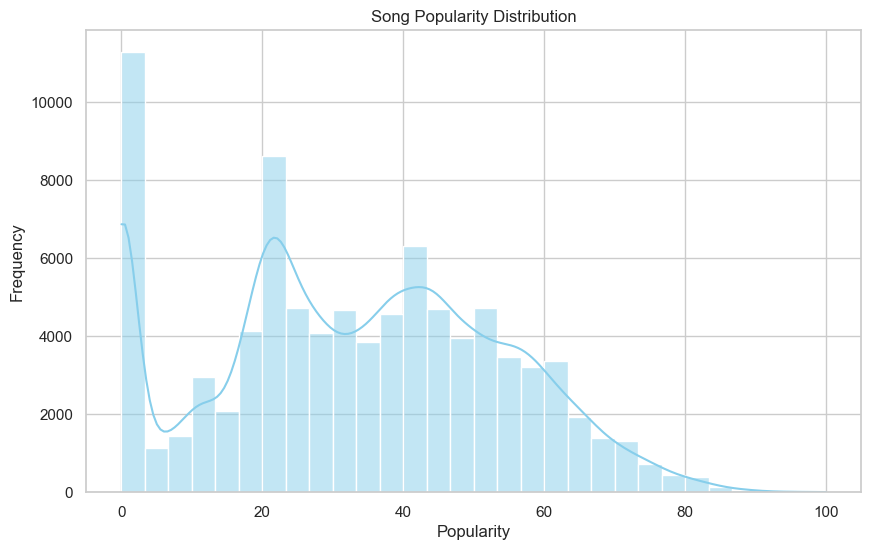

In [16]:
# 📌 Cell 6: Popularity Distribution
sns.histplot(df["popularity"], bins=30, kde=True, color="skyblue")
plt.title("Song Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


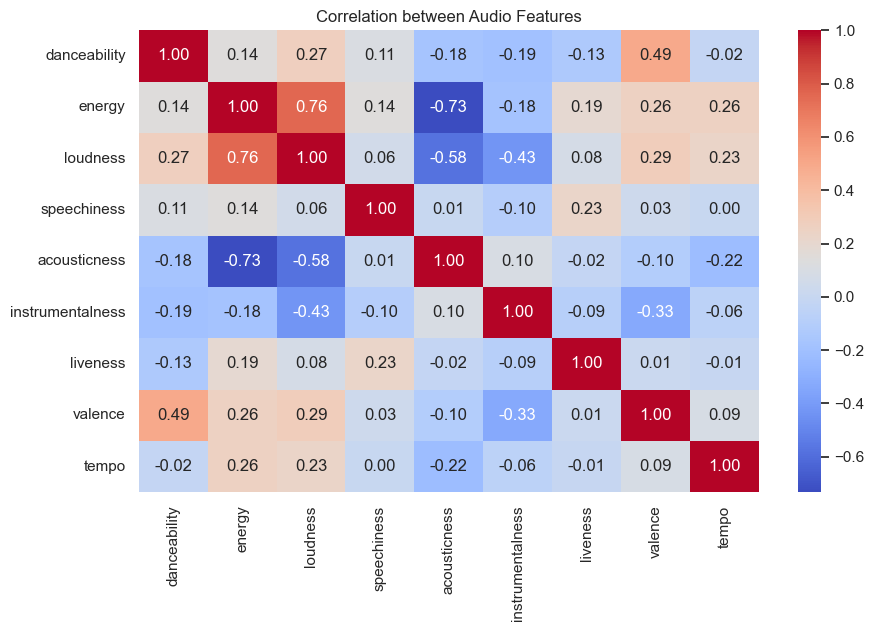

In [17]:
# 📌 Cell 7: Correlation Heatmap (audio features)
audio_cols = ['danceability', 'energy', 'loudness', 'speechiness',
              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

subset = df[audio_cols].dropna()
corr = subset.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Audio Features")
plt.show()


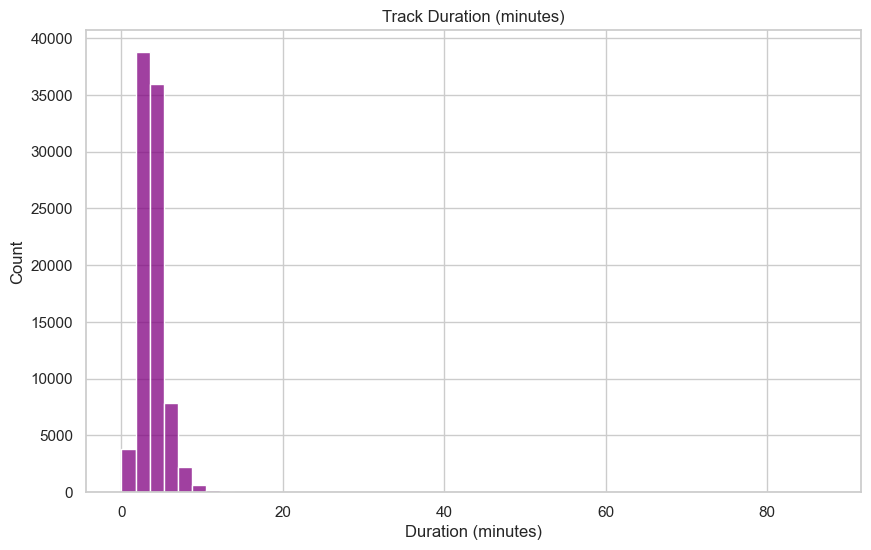

In [18]:
# 📌 Cell 9: Track Duration Distribution
if 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms'] / 60000
    sns.histplot(df['duration_min'], bins=50, color="purple")
    plt.title("Track Duration (minutes)")
    plt.xlabel("Duration (minutes)")
    plt.show()


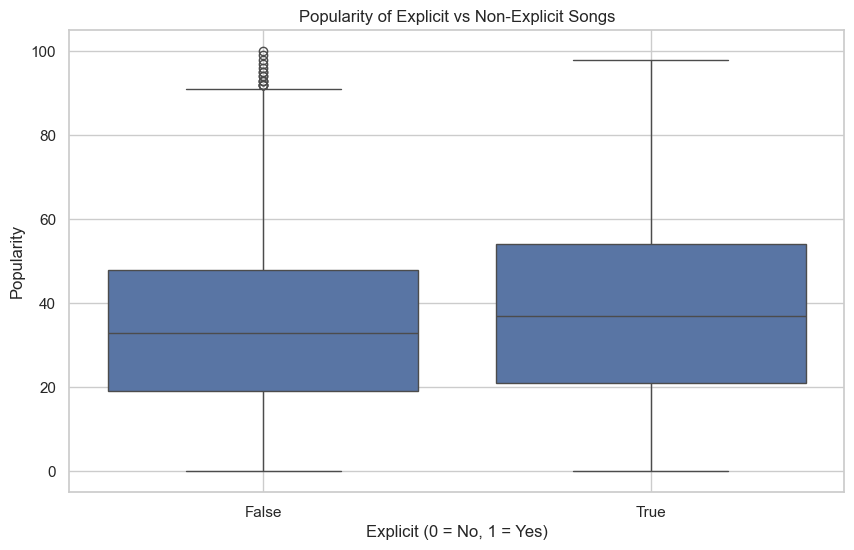

In [19]:
if 'explicit' in df.columns:
    sns.boxplot(data=df, x="explicit", y="popularity")
    plt.title("Popularity of Explicit vs Non-Explicit Songs")
    plt.xlabel("Explicit (0 = No, 1 = Yes)")
    plt.ylabel("Popularity")
    plt.grid(True)
    plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15584\1250401617.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="coolwarm")


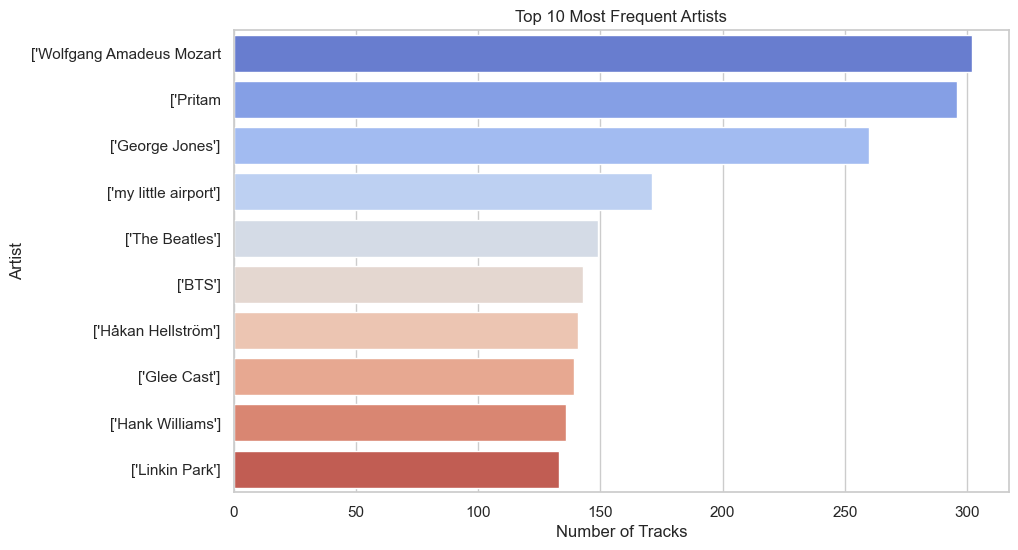

In [20]:
if 'artists' in df.columns:
    artists_series = df['artists'].astype(str).str.split(';').explode()
    top_artists = artists_series.value_counts().head(10)

    sns.barplot(y=top_artists.index, x=top_artists.values, palette="coolwarm")
    plt.title("Top 10 Most Frequent Artists")
    plt.xlabel("Number of Tracks")
    plt.ylabel("Artist")
    plt.show()


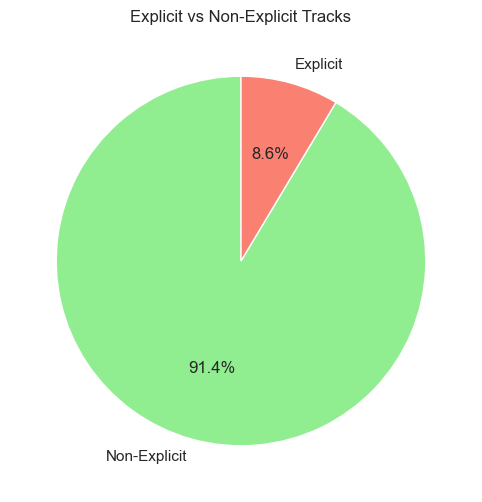

In [21]:
counts = df["explicit"].value_counts()
labels = ["Non-Explicit", "Explicit"]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=["lightgreen", "salmon"])
ax.set_title("Explicit vs Non-Explicit Tracks")
plt.show()


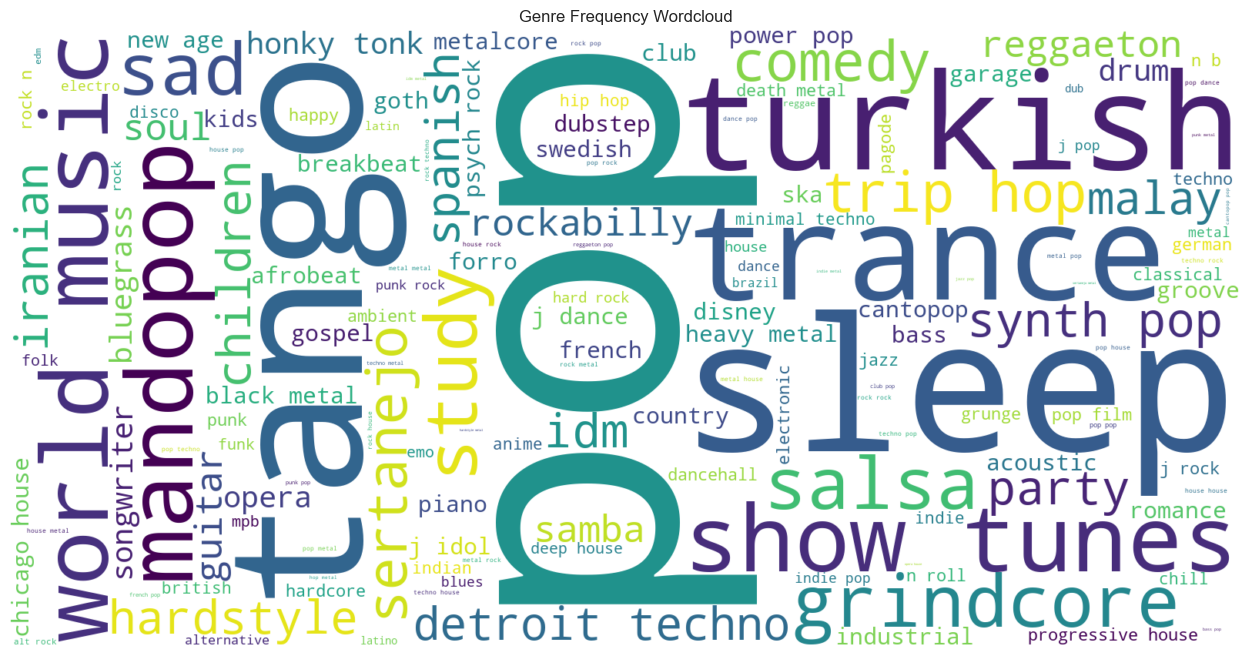

In [22]:
genres = df["track_genre"].dropna().astype(str).str.cat(sep=", ")
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(genres)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Genre Frequency Wordcloud")
plt.show()
